Démo du projet Interactome
par Nicolaï Hoffmann

Le fichier Interactome permet de créer des objets de la classe Interactome, qui vont modéliser un réseau d'intéraction protéine-protéine.
Nous créeons ici un objet demo_ppi, à partir du fichier exemple toy_example.txt, affiché ici :

6
A B
A C
B C
B D
D E
D F

In [13]:
import interactome
import networkx as nx
import matplotlib.pyplot as plt
import os 

demo_ppi = interactome.Interactome("../example_files/toy_example.txt")

Les objets de la classe Interactome possèdent 3 attributs: 
- self.dict, un dictionnaire pour représenter les intéractions du graphe
- self.list, une liste pour représenter les intéractions du graphe
- self.protein, une liste de toutes les protéines dans le graphe

In [20]:
print("self.dict")
print(demo_ppi.dict)
print("self.list")
print(demo_ppi.list)
print("self.protein")
print(demo_ppi.protein)

self.dict
{'A': ['C', 'F', 'B', 'D', 'E'], 'B': ['A'], 'C': ['D', 'A'], 'D': ['C', 'F', 'A'], 'E': ['A'], 'F': ['D', 'A']}
self.list
[('D', 'F'), ('C', 'A'), ('F', 'A'), ('A', 'B'), ('A', 'D'), ('A', 'E')]
self.protein
['A', 'B', 'C', 'D', 'E', 'F']


Le constructeur de la classe Interactome utilise la fonction self.is_interaction_file(), qui vérifie que le fichier d'entrée est bien au format valide, c'est à dire qu'il n'est pas vide, que la première ligne est un chiffre et qu'il correspond au bon nombre d'interactions, et que le fichier ne contient pas plus de deux colonnes.

In [3]:
file = open("../example_files/empty_file.csv")
print(file.read())
print(interactome.Interactome("../example_files/empty_file.csv"))

file.close()

ValueError: The input file is not in a valid PPI network file format

In [4]:
file = open("../example_files/wrong_first_line.csv")
print(file.read())
print(interactome.Interactome("../example_files/wrong_first_line.csv"))

file.close()

10
X,B
D,X
A,D
A,B
B,C
A,C
C,Y
C,G
A,F
F,E
E,D


ValueError: The input file is not in a valid PPI network file format

In [5]:
file = open("../example_files/wrong_columns.csv")
print(file.read())
print(interactome.Interactome("../example_files/wrong_columns.csv"))

file.close()

10
X,B,F
D,X
A,D
A,B
B,C
A,C
C,Y
C,G,Y
A,F
F,E
E,D


ValueError: The input file is not in a valid PPI network file format

La classe Interactome peut aussi prendre en entrée un fichier contenant des intéraction redondantes ou des homo-dimères, et les enlever pour l'écrire dans un nouveau fichier.

In [6]:
print("Le fichier avec des informations redondantes :")
file = open("../example_files/toy_example_dirty.txt")
print(file.read())

demo_ppi.clean_interactome("../example_files/toy_example_dirty.txt", "clean_example.txt")

print("Le fichier nettoyé :")
file = open("clean_example.txt")
print(file.read())

file.close()

os.remove("clean_example.txt")

Le fichier avec des informations redondantes :
9
A B
A C
B C
C B
B B
B D
D E
D F
D B
Le fichier nettoyé :
6
A B
A C
B C
B D
D E
D F



Le graphe représenté dans l'objet de classe Interactome est explorable via des méthodes

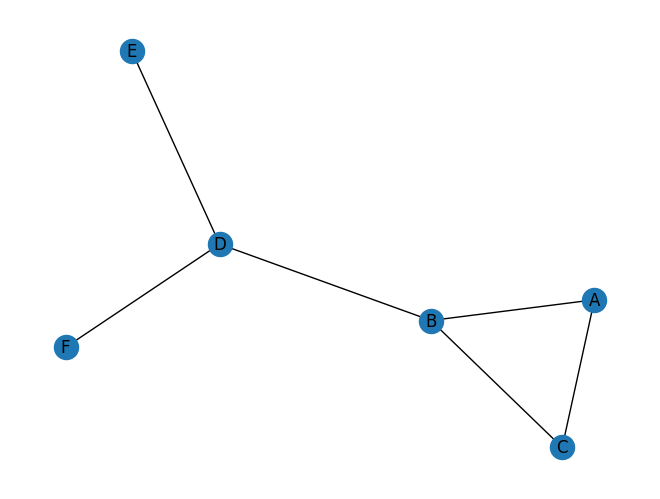

Le nombre de sommets de ce graphe est de 6
Le nombre d'arêtes est de 6
Le degrée du noeud B est de  3
Le degrée maximal est de 3 , trouvé chez le/les noeuds ['B', 'D']
Le degré moyen du graphe est de 2.0
Le nombre de protéines avec un degré de 2 est de 2
L'histogramme des degrés de 1 à 4
1  **
2  **
3  **
4  
{1: 2, 2: 2, 3: 2, 4: 0}


In [14]:
g=nx.Graph(demo_ppi.dict)
nx.draw(g, with_labels = True)
plt.draw()
plt.show()

print("Le nombre de sommets de ce graphe est de", demo_ppi.count_vertices())
print("Le nombre d'arêtes est de", demo_ppi.count_edges())
print("Le degrée du noeud B est de ",demo_ppi.get_degree("B"))
print("Le degrée maximal est de", demo_ppi.get_max_degree()[1],", trouvé chez le/les noeuds", demo_ppi.get_max_degree()[0])
print("Le degré moyen du graphe est de", demo_ppi.get_ave_degree())
print("Le nombre de protéines avec un degré de 2 est de", demo_ppi.count_degree(2))
print("L'histogramme des degrés de 1 à 4")
print(demo_ppi.histogram_degree(1,4))

In [8]:
print("La densité de l'Interactome est de", demo_ppi.density())
print("Le coefficient de clustering du noeud A est de", demo_ppi.clustering("A"))
print("Celui de F de", demo_ppi.clustering("F"))

La densité de l'Interactome est de 0.4
Le coefficient de clustering du noeud A est de 1.0
Celui de F de 0


La classe Interactome peut aussi générer des graphes aléatoires en utilisant les noeuds du fichier original, qui vont remplacer les attributs dict et list de l'object courant.

Graphe de Erdos-Renyi:

Attributs initiaux et graphe initial
Dictionnaire :  {'A': ['B', 'C'], 'B': ['A', 'C', 'D'], 'C': ['A', 'B'], 'D': ['B', 'E', 'F'], 'E': ['D'], 'F': ['D']}
Liste :  [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('D', 'E'), ('D', 'F')]


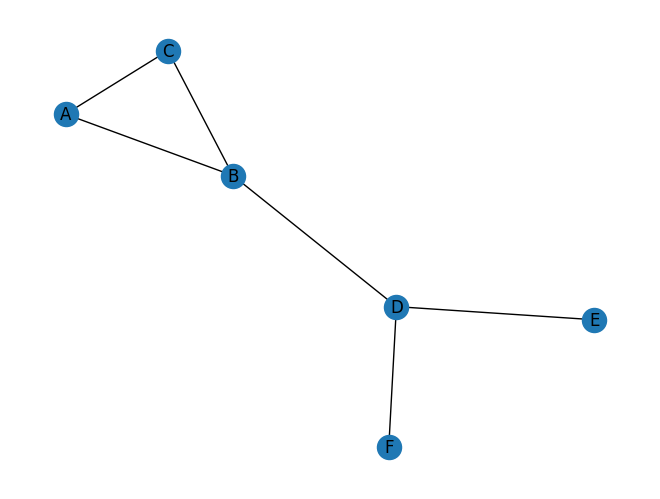

Nouveaux attributs après création par Erdos-Renyi, avec une probabilité de 0.3
Dictionnaire :  {'A': ['B', 'C'], 'B': ['A', 'D', 'E', 'C', 'F'], 'C': ['A', 'B', 'E', 'F'], 'D': ['B'], 'E': ['B', 'C'], 'F': ['B', 'C']}
Liste :  [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'B'), ('E', 'C'), ('F', 'B'), ('F', 'C')]


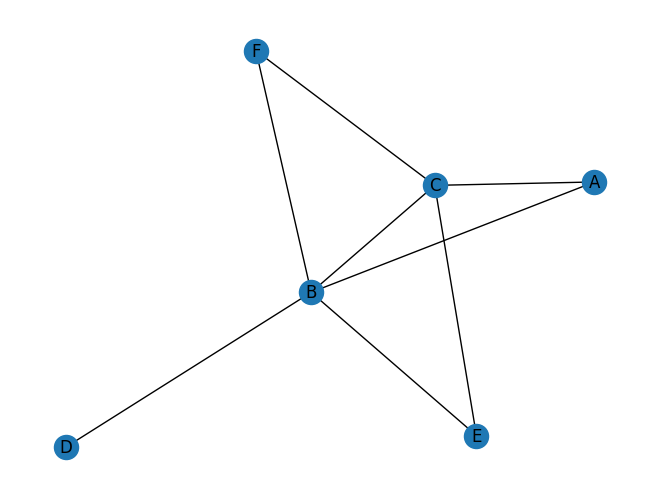

In [21]:
demo_ppi = interactome.Interactome("../example_files/toy_example.txt")

print("Attributs initiaux et graphe initial")
print("Dictionnaire : ",demo_ppi.dict)
print("Liste : ",demo_ppi.list)

g=nx.Graph(demo_ppi.dict)
nx.draw(g, with_labels = True)
plt.draw()
plt.show()


demo_ppi.grapher(0.3)

print("Nouveaux attributs après création par Erdos-Renyi, avec une probabilité de 0.3")
print("Dictionnaire : ",demo_ppi.dict)
print("Liste : ",demo_ppi.list)

g=nx.Graph(demo_ppi.dict)
nx.draw(g, with_labels = True)
plt.draw()
plt.show()

On peut également générer des graphes avec le modèle de Barabasi-Albert

Attributs initiaux et graphe initial
Dictionnaire :  {'A': ['C', 'X', 'I', 'Z'], 'B': ['L', 'E', 'T', 'Y', 'U', 'S', 'X'], 'C': ['V', 'A', 'Z', 'U'], 'D': ['N', 'I', 'V', 'F', 'M'], 'E': ['G', 'B', 'K', 'Y', 'I', 'N', 'W', 'V', 'F'], 'F': ['Z', 'R', 'V', 'T', 'M', 'P', 'K', 'D', 'E', 'G'], 'G': ['E', 'T', 'J', 'F', 'V'], 'H': ['R', 'L', 'W', 'X', 'H', 'I', 'Q', 'U', 'T'], 'I': ['P', 'D', 'R', 'H', 'E', 'A', 'S', 'M'], 'J': ['L', 'V', 'Q', 'R', 'G', 'N', 'M'], 'K': ['E', 'Y', 'F'], 'L': ['B', 'S', 'J', 'H', 'Z', 'U', 'M'], 'M': ['F', 'X', 'W', 'I', 'L', 'J', 'D'], 'N': ['D', 'Z', 'X', 'E', 'Y', 'J'], 'O': ['Z', 'U'], 'P': ['I', 'F', 'T', 'W', 'Q'], 'Q': ['J', 'W', 'X', 'Q', 'S', 'T', 'H', 'P'], 'R': ['H', 'T', 'F', 'J', 'Y', 'I', 'R'], 'S': ['Y', 'L', 'Q', 'B', 'I'], 'T': ['R', 'V', 'F', 'T', 'B', 'G', 'P', 'Q', 'X', 'H'], 'U': ['W', 'B', 'H', 'X', 'L', 'C', 'O'], 'V': ['C', 'T', 'F', 'J', 'W', 'D', 'E', 'G'], 'W': ['U', 'V', 'Q', 'X', 'H', 'M', 'Y', 'P', 'E'], 'X': ['Z', 'N', 'M', 'W',

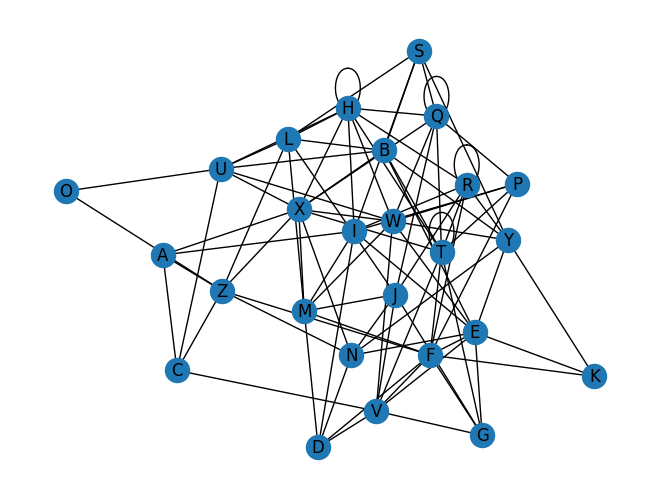

Nouveaux attributs après création par Barabsi-Albert
Dictionnaire :  {'A': ['Y'], 'B': ['Y'], 'C': ['Y'], 'D': ['Y', 'P', 'V', 'W'], 'E': ['Y'], 'F': ['Y'], 'G': ['Y'], 'H': ['Y', 'M'], 'I': ['Y'], 'J': ['Y'], 'K': ['Y'], 'L': ['Y', 'Z'], 'M': ['Y', 'H'], 'N': ['Y', 'P'], 'O': ['Y'], 'P': ['Y', 'D', 'N'], 'Q': ['Y'], 'R': ['Y'], 'S': ['Y'], 'T': ['Y'], 'U': ['Y'], 'V': ['Y', 'D', 'Z'], 'W': ['Y', 'D'], 'X': ['Y'], 'Y': ['Z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X'], 'Z': ['Y', 'L', 'V']}
Liste :  [('Y', 'A'), ('Y', 'B'), ('Y', 'C'), ('Y', 'D'), ('Y', 'E'), ('Y', 'F'), ('Y', 'G'), ('Y', 'H'), ('Y', 'I'), ('Y', 'J'), ('Y', 'K'), ('Y', 'L'), ('Y', 'M'), ('Y', 'N'), ('Y', 'O'), ('Y', 'P'), ('Y', 'Q'), ('Y', 'R'), ('Y', 'S'), ('Y', 'T'), ('Y', 'U'), ('Y', 'V'), ('Y', 'W'), ('Y', 'X'), ('Y', 'Z'), ('Z', 'L'), ('D', 'P'), ('D', 'V'), ('D', 'W'), ('H', 'M'), ('N', 'P'), ('V', 'Z')]


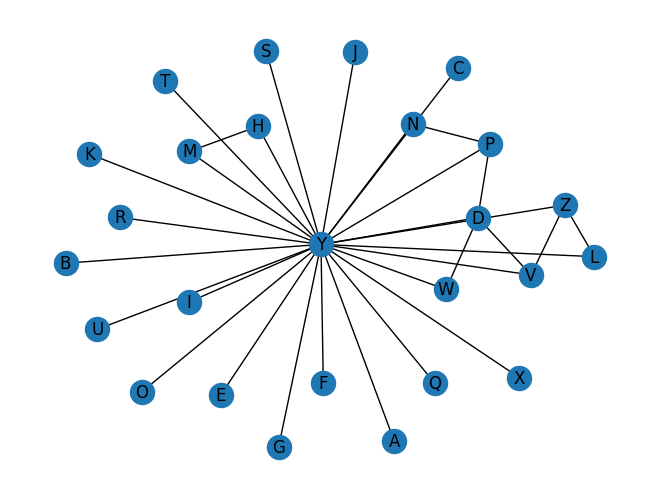

In [23]:
demo_ppi = interactome.Interactome("../example_files/random.csv")

print("Attributs initiaux et graphe initial")
print("Dictionnaire : ",demo_ppi.dict)
print("Liste : ",demo_ppi.list)

g=nx.Graph(demo_ppi.dict)
nx.draw(g, with_labels = True)
plt.draw()
plt.show()


demo_ppi.graphba()

print("Nouveaux attributs après création par Barabsi-Albert")
print("Dictionnaire : ",demo_ppi.dict)
print("Liste : ",demo_ppi.list)

g=nx.Graph(demo_ppi.dict)
nx.draw(g, with_labels = True)
plt.draw()
plt.show()

Nous pouvons également travailler sur les composantes connexes du graphe.

Dans ce toy_example, il y a 1 composante(s) connexe(s), de taille [6]
Ceci est le graphe d'un autre toy example


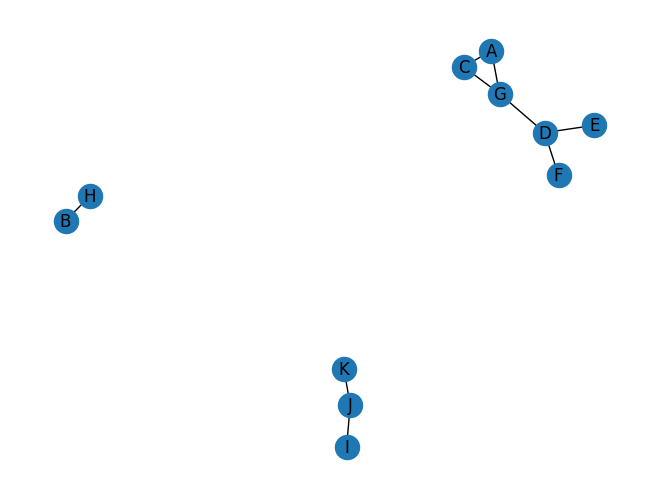

Dans ce graphe, il y a 3 composante(s) connexe(s), de taille [6, 2, 3]
Les sommets de la composante connexte de A sont ['A', 'G', 'C', 'D', 'E', 'F']
La liste lcc est : [0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2]
La liste des composantes connexes, écrite dans un fichier:
6 ['A', 'G', 'C', 'D', 'E', 'F']
2 ['B', 'H']
3 ['I', 'J', 'K']



In [11]:
demo_ppi = interactome.Interactome("../example_files/toy_example.txt")
print("Dans ce toy_example, il y a",demo_ppi.count_cc()[0],"composante(s) connexe(s), de taille",demo_ppi.count_cc()[1])

print("Ceci est le graphe d'un autre toy example")
demo_ppi = interactome.Interactome("../example_files/toy2.txt")

g=nx.Graph(demo_ppi.dict)
nx.draw(g, with_labels = True)
plt.draw()
plt.show()

print("Dans ce graphe, il y a",demo_ppi.count_cc()[0],"composante(s) connexe(s), de taille",demo_ppi.count_cc()[1])
print("Les sommets de la composante connexte de A sont", demo_ppi.extract_cc("A"))
print("La liste lcc est :", demo_ppi.compute_cc())

#L'écriture des différentes composantes connexes d'un graphe dans un fichier
demo_ppi.write_cc("composante_connexe.txt")
file = open("composante_connexe.txt")
print("La liste des composantes connexes, écrite dans un fichier:")
print(file.read())

file.close()

os.remove("composante_connexe.txt")